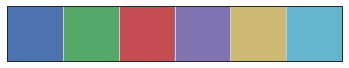

In [1]:
import sys
import sympy as sy
from sympy.abc import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as mtick
from matplotlib.mlab import griddata
import matplotlib.colors as colors
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm
import mpmath as mp
import seaborn as sbn
sbn.set(font_scale = 2.0)
import scipy as sci
import scipy.special as special
import scipy.constants as const
import scipy.optimize as optimize
from scipy.interpolate import interp1d
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2
mpl.rc('font', family='DejaVu Sans')
#mpl.rc('font', weight='bold')
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.width'] = 2
#Customizations
import matplotlib as mpl
# mpl.rcParams['font.size'] = 16
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Helvetica']
# for Palatino and other serif fonts use:
# rc('font',**{'family':'serif','serif':['Palatino']})
mpl.rc('text', usetex=True)
mpl.rcParams['text.latex.preamble'] = [
       r'\usepackage[version=4]{mhchem}',# chemical reactions
       r'\usepackage{siunitx}',   # i need upright \micro symbols, but you need...
       r'\sisetup{detect-all}',   # ...this to force siunitx to actually use your fonts
       r'\usepackage{helvet}',    # set the normal font here
       r'\usepackage{sansmath}',  # load up the sansmath so that math -> helvet
       r'\sansmath'               # <- tricky! -- gotta actually tell tex to use!
] 
sy.init_printing()
from IPython.display import display, Math, Latex
import itertools as itt
current_palette = sbn.color_palette()
#sbn.set_style('darkgrid', {'axes.linewidth': '1', 'axes.edgecolor': '0.15'})
# sbn.set_style("whitegrid", {'axes.grid' : False})
sbn.set_style("whitegrid", {'axes.linewidth': '1', 'axes.edgecolor': '0.15'})
#sbn.palplot(current_palette = sbn.color_palette())
sbn.palplot(current_palette)
plt.show()


## Constants

In [2]:
Temperature = 300.0# Particle temperature in Kelvin
KT = const.Boltzmann*Temperature
rho = 2.33*(1e-3/1e-6)# g/cm3 -> Kg/m3
pi = const.pi
eps0 = const.epsilon_0
echarge = const.elementary_charge
Ke = 1.0/(4.0*pi*eps0)
Epsilon = 11.68

## Functions

In [3]:
def beta_free(vol1, vol2, temp=Temperature, rho=rho):
    ''' Coagulation rate in the free molecular regime
    '''   
    beta0 = (3.0/(4.0*np.pi))**(1/6)*np.sqrt(6.0*const.Boltzmann *temp/rho)
    return beta0 * np.sqrt(1.0/vol1 +1.0/vol2) * (vol1**(1.0/3.0)+vol2**(1.0/3.0))**2

In [4]:
def volume_from_radius(radius):
    ''' Compute volume from radius
    '''
    return (4.0 * pi * radius**3)/3.0

## Variables

In [5]:
radii = np.linspace(0.5, 50.0, 500,endpoint=True)*1e-9# radii = 1 - 50 nm

In [6]:
volumes = volume_from_radius(radii)

In [7]:
rx, ry = np.meshgrid(radii*1e9, radii*1e9)
dx, dy = 2.0*rx, 2.0*ry
vx, vy = np.meshgrid(volumes, volumes)

In [8]:
bf = beta_free(vx, vy)

## Coagulation rate as a function of particle size

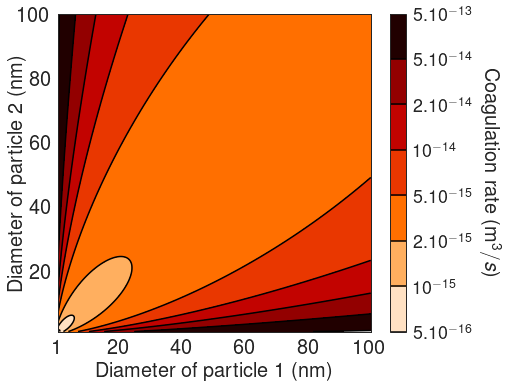

In [21]:
fig, ax = plt.subplots(figsize=(7, 5.85))

#levels = MaxNLocator(nbins=15).tick_values(bf.min(), bf.max())
#levels[0] = 1e-16
#levels = np.logspace(-16, -12, 10)
#levels = 10.0**np.arange(-16, -11)
levels = [5e-16, 1e-15, 2e-15, 5e-15, 1e-14, 2e-14, 5e-14, 5e-13]
#levels = np.logspace(np.log10(np.min(bf)), np.log10(np.max(bf)), 1)
#levels[0] = np.min(bf)
#levels[-1] = np.max(bf)
#levels = np.arange(np.floor(np.log10(bf.min())-1),
#                   np.ceil(np.log10(bf.max())+1))
cf = ax.contourf(dx, dy, bf, levels=levels, cmap=cm.gist_heat_r,  norm=colors.LogNorm())
#cf = ax.contourf(dx, dy, bf, levels=levels, cmap=cm.gist_heat_r,
#                 locator=mtick.LogLocator())
cs = ax.contour(dx, dy, bf, levels=levels, origin='lower',
                colors='k', linewidths=1.5)
cb = fig.colorbar(cf, ax=ax, ticks=levels)
cb.add_lines(cs)
cb.ax.set_ylabel(r'Coagulation rate $(\text{m}^3/s)$', rotation=270, fontsize=20, labelpad=30)
cb.ax.tick_params(labelsize=18)

ax.set_xlabel('Diameter of particle 1 (nm)', size=20)
ax.set_ylabel('Diameter of particle 2 (nm)', size=20, labelpad=-8)
xy=np.arange(0, 120, 20)
xy[0] = 1
plt.xticks(xy, xy)

cb.set_ticks(levels)
cb.set_ticklabels([r'$5.10^{-16}$', r'$10^{-15}$', r'$2.10^{-15}$', r'$5.10^{-15}$',
                   r'$10^{-14}$', r'$2.10^{-14}$', r'$5.10^{-14}$', r'$5.10^{-13}$'])

plt.savefig('beta-free.eps')
plt.show()

In [10]:
np.max(bf)

In [11]:
np.min(bf)